n = 1.2253956351536945 ± 0.0027976810360783697


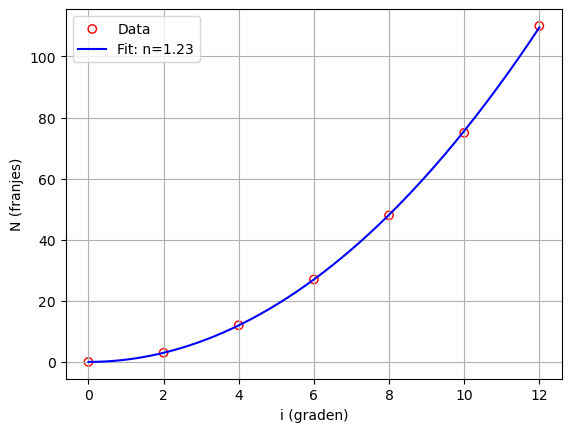

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Model
def N_model(i, n):
    lam = 500e-9   # golflengte (m)
    d   = 1e-3     # dikte (m)
    return (2 * n * d / lam) * (1/np.cos(i) - 1)

# Data
i_deg  = np.array([0, 2, 4, 6, 8, 10, 12])
i_rad  = np.deg2rad(i_deg)
N_data = np.array([0, 3, 12, 27, 48, 75, 110]) #(dit zijn test waardes, deze zullen vervangen worden door onze eigen meetresultaten)

# Eerste schatting
p0 = [1.5]

# Fit
popt, pcov = curve_fit(N_model, i_rad, N_data, p0=p0)
perr = np.sqrt(np.diag(pcov))

print("n =", popt[0], "±", perr[0])

# Plot
i_fit = np.linspace(0, np.deg2rad(12), 300)
plt.scatter(i_deg, N_data, facecolors='none', edgecolors='r', label="Data")
plt.plot(np.rad2deg(i_fit), N_model(i_fit, *popt), 'b-', label=f"Fit: n={popt[0]:.2f}")
plt.xlabel("i (graden)")
plt.ylabel("N (franjes)")
plt.legend()
plt.grid(True)
plt.show()
